# 4. Logistic Regression 

### 공부시간에 따른 자격증 시험 합격 가능성

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv('LogisticRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

### 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### 학습(로지스틱 회귀모델)

In [4]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

### 6시간 공부했을때 예축

In [5]:
classifier.predict([[6]])
# 결과 1은 합격했을 것이라 예측

array([1])

In [7]:
classifier.predict_proba([[6]])
# 불 합격확률:14% 합격할 확률:86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을때 예측

In [6]:
classifier.predict([[4]])
# 결과 0은 불합격했을 것이라 예측

array([0])

In [8]:
classifier.predict_proba([[4]])
# 불 합격확률:62% 합격할 확률:38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측(테스트 세트)

In [9]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [10]:
y_test #실제값

array([1, 0, 1, 0])

In [11]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [12]:
classifier.score(X_test,y_test) #모델 평가

0.75

# 데이터 시각화 (훈련 세트)

In [19]:
X_range=np.arange(min(X),max(X),0.1 ) # X의 최소값에서 최댓값까지를 0.1단위로 잘라서 데티어 생성

In [20]:
p=1/(1+np.exp(-(classifier.coef_*X_range+classifier.intercept_))) #y=mx+b

In [21]:
p.shape

(1, 95)

In [22]:
p=p.reshape(-1) #1치원 베열형태로 변형

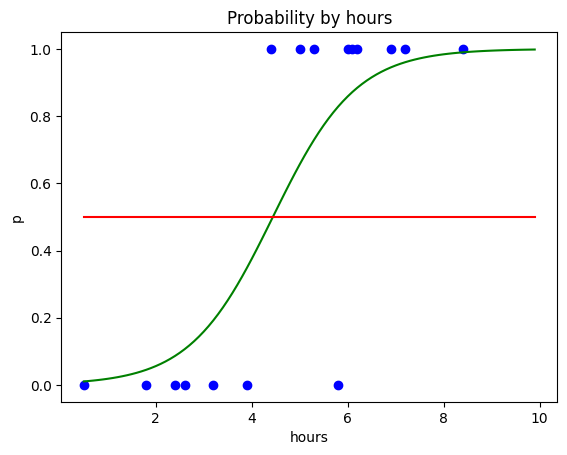

In [23]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_range,p,color='green')
plt.plot(X_range,np.full(len(X_range),0.5),color='red') #X_range 개수 만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('p')
plt.show()


# 데이터 시각화 (테스트 세트)

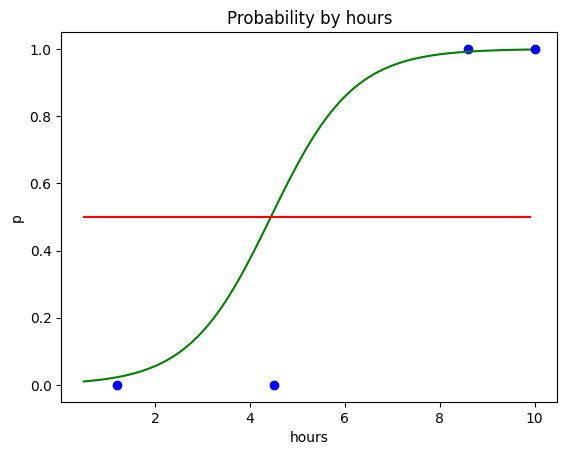

In [24]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_range,p,color='green')
plt.plot(X_range,np.full(len(X_range),0.5),color='red') #X_range 개수 만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('p')
plt.show()


In [25]:
classifier.predict_proba([[4.5]]) #4.5 시간 했울때 확률(모델에서 51%확률로 합격, 실제로는 불 합격)

array([[0.48310686, 0.51689314]])

### 혼돈 행렬(confusion Matrix)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
# TRUE NEGATIVE(TN)  FALSE POSITIVE(FP)
# 불 합격 예측          # 합격 예측
# 실제 불합격           # 실제 불합격
# FALSE NEGATIVE(FN) TRUE POSITIVE(TP)
# 불합격 예측           # 합격예측 
# 실제 합격            #  합격

array([[1, 1],
       [0, 2]])